# Project: Performance Evaluation of Bandit Algorithms

- In this project, you will implement several classical bandit algorithms, evluate their performance via numerical comparison and finally gain inspiring intuition.

## Part I: Classical Bandit Algorithms

We consider a time-slotted bandit system ($t=1,2,\ldots$) with three arms.
We denote the arm set as $\{1,2,3\}$.
Pulling each arm $j$ ($ j \in \{1,2,3\}$) will obtain a random reward $r_{j}$, which follows a Bernoulli distribution with mean $\theta_{j}$, *i.e.*, Bern($\theta_{j}$).
Specifically,

\begin{equation*}
	\begin{aligned}
		r_{j} = 
		\begin{cases}
			1, & w.p.\ \theta_{j}, \\
			0, & w.p.\ 1-\theta_{j},			
		\end{cases}
	\end{aligned}
\end{equation*}
where $\theta_{j}, j \in\{1,2,3\}$ are parameters within $(0,1)$.
  
Now we run this bandit system for $N$ ($N \gg 3$) time slots.
In each time slot $t$, we choose one and only one arm from these three arms, which we denote as $I(t) \in \{1,2,3\}$.
Then we pull the arm $I(t)$ and obtain a random reward $r_{I(t)}$.
Our objective is to find an optimal policy to choose an arm $I(t)$ in each time slot $t$ such that the expectation of the aggregated reward over $N$ time slots is maximized, *i.e.*,

\begin{equation*}
	\begin{aligned}
		\max_{I(t),t = 1,\dots,N} \ \  \mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)} \right].
	\end{aligned}  	
\end{equation*}

If we know the values of $\theta_{j},j \in \{1,2,3\}$, this problem is trivial.
Since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$,

\begin{equation*}
	\begin{aligned}
		\mathbb{E}\left[\sum_{t=1}^N r_{I(t)} \right] 
		= \sum_{t=1}^{N} \mathbb{E}[r_{I(t)}] 
		= \sum_{t=1}^N \theta_{I(t)}.
	\end{aligned} 	
\end{equation*}

Let $I(t) = I^{*} = \mathop{\arg \max}\limits_{ j \in \{1,2,3\}} \ \theta_j$ for $t=1,2,\ldots,N$, then 

\begin{equation*}
	\begin{aligned}
		\max_{I(t),t=1,\ldots,N} \ \  \mathbb{E}\left[\sum_{t=1}^N r_{I(t)} \right] = N \cdot \theta_{I^*}.
	\end{aligned} 	
\end{equation*}

However, in reality, we do not know the values of $\theta_{j},j \in \{1,2,3\}$.
We need to estimate the values $\theta_{j}, j \in \{1,2,3\}$ via empirical samples, and then make the decisions in each time slot. 
Next we introduce three classical bandit algorithms: $\epsilon$-greedy, UCB, and TS, respectively.

### $\epsilon$-greedy Algorithm ($0 \leq \epsilon \leq 1$)
<img src="figures/e-greedy.jpg" width="50%" align='left'>

### UCB (Upper Confidence Bound) Algorithm
<img src="figures/UCB.jpg" width="50%" align='left'>

### TS (Thompson Sampling) Algorithm
<img src="figures/TS.jpg" width="50%" align='left'>

### Problems

1. Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N=5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_{j}, j \in \{1,2,3\}$ and oracle values are unknown to all bandit algorithms.

| Arm $j$ | 1   | 2   | 3   |
|---------|-----|-----|-----|
| $\theta_j$ | 0.7 | 0.5 | 0.4 |

**Your anwser of problem 1 in Part I**

---
# Answer of Problem 1 in Part I
---
Since each arm's parameter is oracled.

So we just need to choose the arm with the largest parameter to have the maximum expectation of aggregate rewards over $N$ time slots.

Since $\theta_1 = 0.7, \theta_2 = 0.5, \theta_3 = 0.4$,

so $\theta_1 > \theta_2 > \theta_3$,

so we choose arm 1 everytime.

i.e. $$\forall t, I(t)=I^*=\argmax_{j\in\{1,2,3\}}\theta_j=1$$
$$\theta_{I(t)} = \theta_1 = 0.7$$

Also, since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$.

So $E(r_{I(t)}) = \theta_{I(t)}$.

So the maximum expected value is 
$$\max_{I(t),t=1,2,\cdots,N}\ E\big[\sum_{t=1}^Nr_{I(t)}\big]$$
$$=\max_{I(t),t=1,2,\cdots,N}\ \sum_{t=1}^NE\big[r_{I(t)}\big]$$
$$=N \cdot \theta_{I^*} = 5000 \times 0.7 = 3500$$

So above all, with the given oracle parameters, the maximum expected value is 3500.

---

2. Implement aforemented three classical bandit algorithms with following settings: 
   
	- $N=5000$
	- $\epsilon$-greedy with $\epsilon \in \{0.1, 0.5, 0.9\}$.
	- UCB with $c \in \{1,5,10\}$.
	- TS with
    	- $\left\{(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)\right\}$ 
    	- $\left\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)\right\}$

**Your anwser of problem 2 in Part I**

---
# Answer of Problem 2 in Part I
---

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random, math, copy
### Import more packages if you need

import tqdm
import matplotlib.pyplot as plt

---
# The initialization of the parameters of different algorithms

In [12]:
### Feel free to insert more blocks or helper functions if you need.

# since the arm's index are {1,2,3}
# so we need to add a 0 at index 0
# to make the index of arm's count and theta match the arm's index

theta_oracled = [0, 0.7, 0.5, 0.4] # the oracled theta of each arm

count = []
theta = []

def init_greedy():
    global count, theta
    count = [0, 0, 0, 0] # the initial count of each arm 
    theta = [0, 0, 0, 0] # the initial theta of each arm

def init_UCB():
    global count, theta
    count = [0, 1, 1, 1] # the initial count of each arm 
    theta = [0, 0, 0, 0] # the initial theta of each arm
    for t in range(1, 4):
        arm = t
        count[arm] = 1
        r_i = np.random.binomial(1, theta_oracled[arm]) # R_I(t) ~ Bern(theta_oracled[I(t)])
        theta[arm] = r_i

def init_TS():
    global count, theta
    count = [0, 0, 0, 0] # the initial count of each arm 
    theta = [0, 0, 0, 0] # the initial theta of each arm

---
# 1. The epsilon-greedy Algorithm

In [3]:
### Implementation of epsilon-Greedy:
### n is the number of time slots, epsilon is the parameter of the algorithm
### return the total reward
def greedy(n, epsilon):
    global count, theta
    init_greedy() # initialize the count and theta of each arm

    sum_theta = 0

    for t in range(1, n + 1): # the time slot
        prob = random.random() # return value is in [0, 1)
        arm = None # the arm to be chosen
        if prob < epsilon: # explore (with probability epsilon)
            arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        else: # exploit (with probability 1 - epsilon)
            arm = np.argmax(theta) # choose the best arm
            if arm == 0: # if this happened, it means that all the theta are 0
                # so we can randomly choose an arm from {1,2,3}
                arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        
        # print("time slot: ", t, " arm: ", arm)
        sum_theta += theta[arm] # update the sum of theta
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

---
# 2. The UCB Algorithm

In [32]:
### Implementation of UCB Algorithm:
### n is the number of time slots, c is the parameter of the algorithm
### return the total reward
def UCB(n, c):
    global count, theta
    init_UCB() # initialize the count and theta of each arm
    sum_theta = theta[1] + theta[2] + theta[3]
    
    for t in range(4, n + 1):
        arm = np.argmax([theta[i] + c * math.sqrt(2 * math.log(t) / count[i]) for i in range(1, 4)]) + 1
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])
        
        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
        sum_theta += theta[arm]

    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

---
# 3. The Thompson Sampling Algorithm

In [9]:
### Implementation of TS Algorithm
### n is the number of time slots, a and b are the parameters of the algorithm
### return the total reward
def TS(n, a, b):
    global count, theta
    init_TS()
    reward = 0 # the expectation of the reward
    sum_theta = 0 # the sum of theta
    max_theta = 0 # the max theta

    for t in range(1, n + 1):
        for i in range(1, 4):
            theta[i] = np.random.beta(a[i], b[i]) # theta[i] ~ Beta(a[i], b[i])
        arm = np.argmax(theta[1:4]) + 1 # choose the best arm
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        a[arm] += r_i # update a[arm]
        b[arm] += 1 - r_i # update b[arm]

        reward += r_i # update the expectation of the reward
        sum_theta += theta[arm] # update the sum of theta
        max_theta = np.max([max_theta, np.max(theta[1:4])]) # update the max theta
    
    regret = n * max_theta - sum_theta # the regret
    return reward, regret # return the total reward and regret

3. Regard each of the above setting in problem 2 of Part I as an experiment (in total $8$ experiments).
Run each experiment $200$ independent trials (change the random seed).
Plot the final result (in terms of rewards and regrets) averaged over these $200$ trials.

**Your anwser of problem 3 in Part I**

---
# Answer of Problem 3 in Part I
---
# settings

In [33]:
N = 5000
repeat_time = 200

# 1. The epsilon-greedy Algorithm
---

In [7]:
### Your code for problem 1.3. Feel free to insert more blocks or helper functions if you need.

epsilon = [0.1, 0.5, 0.9]
rewards = [0, 0, 0]
regrets = [0, 0, 0]

for i in range(3):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = greedy(N, epsilon[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:07<00:00, 27.04it/s]


epsilon =  0.1  reward =  3401.039999999999  regret =  96.25954669680347
epsilon =  0.5  reward =  3081.265000000001  regret =  418.0533831467074
epsilon =  0.9  reward =  2749.7150000000024  regret =  755.1482363262036


([<matplotlib.axis.XTick at 0x18ff379f370>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

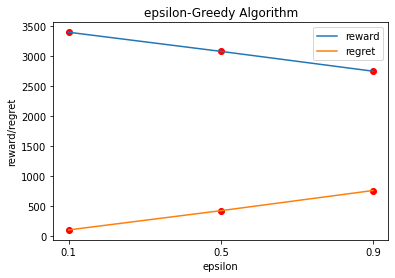

In [9]:
# plot the result
for i in range(len(epsilon)):
    print("epsilon = ", epsilon[i], " reward = ", rewards[i], " regret = ", regrets[i])

plt.plot(epsilon,rewards)
plt.plot(epsilon,regrets)
plt.scatter(epsilon, rewards, c = 'red')
plt.scatter(epsilon, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("epsilon")
plt.ylabel("reward/regret")
plt.title("epsilon-Greedy Algorithm")
plt.xticks(epsilon)

# further exploration of the epsilon-greedy Algorithm
To have a further exploration on the epsilon-greedy Algorithm,

we can set the epsilon to be a function of time.

i.e.

1. inverse ratio: $\epsilon(t) = \dfrac{1}{t}$

2. linear: $\epsilon(t) = 1 - \dfrac{t - 1}{N - 1}$

3. the logarithmic function: $\epsilon(t) = \dfrac{1}{\log(t)+1}$

4. the exponential function: $\epsilon(t) = 0.98^t$

And we can put them into experiment to test the performance of the epsilon-greedy Algorithm.

In [5]:
def greedy_function(n, epsilon): # same as the original greedy algorithm
                        # but the epsilon is a function epsilon(t)
    global count, theta
    init_greedy() # initialize the count and theta of each arm

    sum_theta = 0

    for t in range(1, n + 1): # the time slot
        prob = random.random() # return value is in [0, 1)
        arm = None # the arm to be chosen
        if prob < epsilon[t]: # explore (with probability epsilon)
            arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        else: # exploit (with probability 1 - epsilon)
            arm = np.argmax(theta) # choose the best arm
            if arm == 0: # if this happened, it means that all the theta are 0
                # so we can randomly choose an arm from {1,2,3}
                arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        
        # print("time slot: ", t, " arm: ", arm)
        sum_theta += theta[arm] # update the sum of theta
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

In [14]:
epsilon_inverse = [0] + [1 / t for t in range(1, N + 1)]
epsilon_linear = [0] + [1 - 1 / (N - 1) * (t - 1) for t in range(1, N + 1)]
epsilon_log = [0] + [1 / (1 + math.log(t)) for t in range(1, N + 1)]
epsilon_exp = [0] + [0.98 ** t for t in range(1, N + 1)]

epsilon = [epsilon_inverse, epsilon_linear, epsilon_log, epsilon_exp]

rewards = [0, 0, 0, 0]
regrets = [0, 0, 0, 0]

for i in range(4):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = greedy_function(N, epsilon[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:10<00:00, 18.53it/s]


1. inverse ratio:
   epsilon(t) = 1 / t
   reward =  3293.8100000000004 
   regret =  15.908469515101356 

2. linear:
   epsilon(t) = 1 - 1 / (N - 1) * (t - 1)
   reward =  3080.3550000000005 
   regret =  414.92228599960885 

3. the logarithmic function:
   epsilon(t) = 1 / (1 + log(t))
   reward =  3396.245000000001 
   regret =  105.6549611319986 

4. the exponential function:
   epsilon(t) = 0.98 ^ t
   reward =  3468.9649999999992 
   regret =  6.458722511804319 



([<matplotlib.axis.XTick at 0x1b4d66e4e50>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

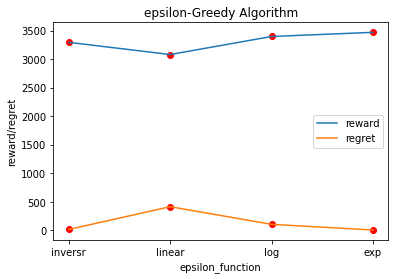

In [25]:
# plot the result
print("1. inverse ratio:\n   epsilon(t) = 1 / t\n   reward = ", rewards[0], "\n   regret = ", regrets[0], "\n")
print("2. linear:\n   epsilon(t) = 1 - 1 / (N - 1) * (t - 1)\n   reward = ", rewards[1], "\n   regret = ", regrets[1], "\n")
print("3. the logarithmic function:\n   epsilon(t) = 1 / (1 + log(t))\n   reward = ", rewards[2], "\n   regret = ", regrets[2], "\n")
print("4. the exponential function:\n   epsilon(t) = 0.98 ^ t\n   reward = ", rewards[3], "\n   regret = ", regrets[3], "\n")

epsilon_name = ['inversr', 'linear', 'log', 'exp']
plt.plot(epsilon_name,rewards)
plt.plot(epsilon_name,regrets)
plt.scatter(epsilon_name, rewards, c = 'red')
plt.scatter(epsilon_name, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("epsilon_function")
plt.ylabel("reward/regret")
plt.title("epsilon-Greedy Algorithm")
plt.xticks(epsilon_name)

---
# 2. The UCB Algorithm

In [34]:
c = [1, 5, 10]
rewards = [0, 0, 0]
regrets = [0, 0, 0]

for i in range(3):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = UCB(N, c[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:13<00:00, 14.62it/s]


c =  1  reward =  3405.9050000000025  regret =  82.04944510479272
c =  5  reward =  2981.59  regret =  516.573424366621
c =  10  reward =  2826.27  regret =  672.8341245829002


([<matplotlib.axis.XTick at 0x1ed85554d30>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

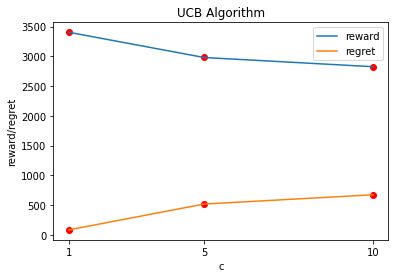

In [35]:
# plot the result
for i in range(len(c)):
    print("c = ", c[i], " reward = ", rewards[i], " regret = ", regrets[i])

plt.plot(c,rewards)
plt.plot(c,regrets)
plt.scatter(c, rewards, c = 'red')
plt.scatter(c, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("c")
plt.ylabel("reward/regret")
plt.title("UCB Algorithm")
plt.xticks(c)

# further exploration of the UCB Algorithm

To have a further exploration on the UCB Algorithm,

we can set the c to be a function of time.

i.e.

1. inverse ratio: $c(t) = 1 + \dfrac{1}{t}$

2. linear: $c(t) = 10 - \dfrac{9(t - 1)}{N - 1}$

3. the logarithmic function: $c(t) = 1 + \dfrac{1}{\log(t)+1}$

4. the exponential function: $c(t) = 1 +0.98^t$

And we can put them into experiment to test the performance of the UCB Algorithm.

The functions' setting are very samilar to those in the epsilon-greedy algorthm, however, we added a limitation that $c\geq 1$ must always holds. This is to make sure we have enough exploration in the early stage of the experiment.

In [40]:
def UCB_function(n, c):
    global count, theta
    init_UCB() # initialize the count and theta of each arm
    sum_theta = theta[1] + theta[2] + theta[3]
    
    for t in range(4, n + 1):
        arm = np.argmax([theta[i] + c[t] * math.sqrt(2 * math.log(t) / count[i]) for i in range(1, 4)]) + 1
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])
        
        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
        sum_theta += theta[arm]

    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

In [41]:
c_inverse = [0] + [1 + 1 / t for t in range(1, N + 1)]
c_linear = [0] + [10 - 9 / (N - 1) * (t - 1) for t in range(1, N + 1)]
c_log = [0] + [1 + 1 / (1 + math.log(t)) for t in range(1, N + 1)]
c_exp = [0] + [1 + 0.95 ** t for t in range(1, N + 1)]

c = [c_inverse, c_linear, c_log, c_exp]

rewards = [0, 0, 0, 0]
regrets = [0, 0, 0, 0]

for i in range(4):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = UCB_function(N, c[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

  0%|          | 0/200 [00:00<?, ?it/s]

 16%|█▌        | 31/200 [00:02<00:13, 12.42it/s]


KeyboardInterrupt: 

1. inverse ratio:
   c(t) = 1 + 1 / t
   reward =  409.68499999999995 
   regret =  11.126422356219582 

2. linear:
   c(t) = 10 - 9 / (N - 1) * (t - 1)
   reward =  0 
   regret =  0 

3. the logarithmic function:
   c(t) = 1 + 1 / (1 + log(t))
   reward =  0 
   regret =  0 

4. the exponential function:
   c(t) = 1 + 0.98 ^ t
   reward =  0 
   regret =  0 



([<matplotlib.axis.XTick at 0x1ed856af2e0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

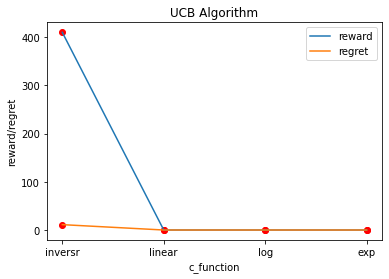

In [38]:
# plot the result
print("1. inverse ratio:\n   c(t) = 1 + 1 / t\n   reward = ", rewards[0], "\n   regret = ", regrets[0], "\n")
print("2. linear:\n   c(t) = 10 - 9 / (N - 1) * (t - 1)\n   reward = ", rewards[1], "\n   regret = ", regrets[1], "\n")
print("3. the logarithmic function:\n   c(t) = 1 + 1 / (1 + log(t))\n   reward = ", rewards[2], "\n   regret = ", regrets[2], "\n")
print("4. the exponential function:\n   c(t) = 1 + 0.98 ^ t\n   reward = ", rewards[3], "\n   regret = ", regrets[3], "\n")

c_name = ['inversr', 'linear', 'log', 'exp']
plt.plot(c_name,rewards)
plt.plot(c_name,regrets)
plt.scatter(c_name, rewards, c = 'red')
plt.scatter(c_name, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("c_function")
plt.ylabel("reward/regret")
plt.title("UCB Algorithm")
plt.xticks(c_name)

---
# 3. The Thompson Sampling Algorithm

In [31]:
a = [[0, 1, 1, 1], [0, 601, 401, 2]]
b = [[0, 1, 1, 1], [0, 401, 601, 3]]

rewards = [0, 0]
regrets = [0, 0]
for i in range(2):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = TS(N, a[i], b[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:35<00:00,  5.70it/s]


alpha = [1, 1, 1]     beta = [1, 1, 1]      reward =  3497.070000000002  regret =  39.02128959851645
alpha = [601, 401, 2] beta = [401, 601, 3]  reward =  3499.620000000002  regret =  23.78772822924203


([<matplotlib.axis.XTick at 0x2f4b0280e50>,
 [Text(0, 0, ''), Text(0, 0, '')])

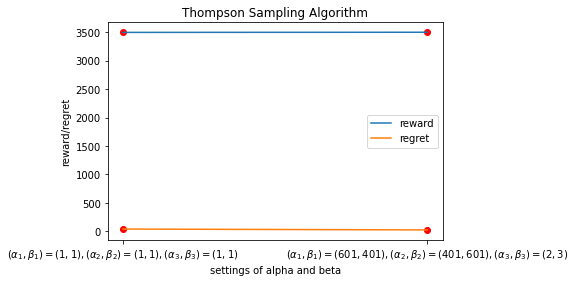

In [32]:
### Your code for problem 1.4. Feel free to insert more blocks or helper functions if you need.
print("alpha = [1, 1, 1]     beta = [1, 1, 1]      reward = ", rewards[0], " regret = ", regrets[0])
print("alpha = [601, 401, 2] beta = [401, 601, 3]  reward = ", rewards[1], " regret = ", regrets[1])

x = [r"$(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)$",r"$(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)$"]
plt.plot(x,rewards)
plt.plot(x,regrets)
plt.scatter(x, rewards, c = 'red')
plt.scatter(x, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("settings of alpha and beta")
plt.ylabel("reward/regret")
plt.title("Thompson Sampling Algorithm")
plt.xticks(x)

# further exploration of the Thompson Sampling Algorithm




In [29]:
a = [[0, 1001, 505, 1], [0, 801, 201, 201]]
b = [[0, 1, 505, 1001], [0, 201, 801, 501]]

rewards = [0, 0]
regrets = [0, 0]
for i in range(2):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = TS(N, a[i], b[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:36<00:00,  5.49it/s]


alpha = [1001, 505, 1] beta = [1, 505, 1001]    reward =  3505.345  regret =  20.961296734707624
alpha = [801, 201, 201] beta = [201, 801, 501]  reward =  3501.654999999999  regret =  17.52735565212871


([<matplotlib.axis.XTick at 0x1b4d9c38fa0>,
 [Text(0, 0, ''), Text(0, 0, '')])

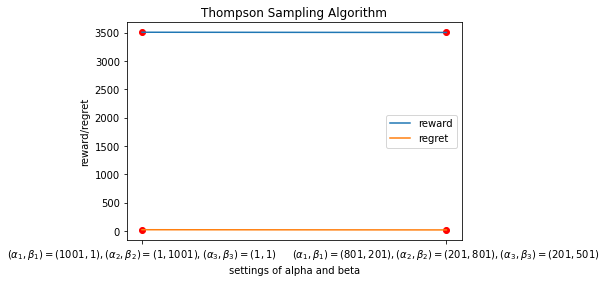

In [31]:
print("alpha = [1001, 505, 1] beta = [1, 505, 1001]    reward = ", rewards[0], " regret = ", regrets[0])
print("alpha = [801, 201, 201] beta = [201, 801, 501]  reward = ", rewards[1], " regret = ", regrets[1])

x = [r"$(\alpha_1,\beta_1)=(1001,1),(\alpha_2,\beta_2)=(1,1001),(\alpha_3,\beta_3)=(1,1)$",r"$(\alpha_1,\beta_1)=(801,201),(\alpha_2,\beta_2)=(201,801),(\alpha_3,\beta_3)=(201,501)$"]
plt.plot(x,rewards)
plt.plot(x,regrets)
plt.scatter(x, rewards, c = 'red')
plt.scatter(x, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("settings of alpha and beta")
plt.ylabel("reward/regret")
plt.title("Thompson Sampling Algorithm")
plt.xticks(x)

4. Compute the gaps between the algorithm outputs (aggregated rewards over $N$ time slots) and the oracle value. Compare the numerical results of $\epsilon$-greedy, UCB, and TS.
   - Which one is the best?
   - Discuss the impacts of $\epsilon$, $c$, and $\alpha_{j}$, $\beta_{j}$, respectively. 

**Your anwser of problem 4 in Part I**

---
# Answer of Problem 4 in Part I
---

## 1. the epsilon-greedy algorithm

### <1> the original

| epsilon |   Reward  | Regret  |
|:-------:|:---------:|:-------:|
|   0.1   | 3401.04   | 96.26   |
|   0.5   | 3081.265  | 418.053 |
|   0.9   | 2749.715  | 755.148 |

### <2> further exploration
We can set that the $\epsilon$ changes as time changing, i.e. $\epsilon$ is a function of $t:\epsilon(t)$.

|   property    |     $\epsilon(t)$     |   Reward  | Regret  |
|:-------------:|:---------------------:|:---------:|:-------:|
| inverse ratio | $\dfrac{1}{t}$        | 3293.81   | 15.908  |
| linear        | $1-\dfrac{t-1}{N-1}$  | 3080.355  | 414.922 |
| log           | $\dfrac{1}{1+log(t)}$ | 3396.245  | 105.655 |
| exp           | $0.98^t$              | 3468.965  | 6.459   |

## 2. the UCB algorithm

### <1> the original

| c   |   Reward  | Regret  |
|:---:|:---------:|:-------:|
| 1   | 3405.905  | 82.049  |
| 5   | 2981.59   | 516.573 |
| 10  | 2826.27   | 672.834 |

### <2> further exploration





## 3. the Thompson Sampling algorithm

### <1> the original

| $\alpha,\beta$ setting   |   Reward  | Regret  |
|:---:|:---------:|:-------:|
| $(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)$           | 3497.07  | 39.021 |
| $(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)$   | 3499.62  | 23.788 |

### <2> further exploration

If we set the prior settings of $\alpha,\beta$, we could find that the 

| $\alpha,\beta$ setting   |   Reward  | Regret  |
|:---:|:---------:|:-------:|
| $(\alpha_1,\beta_1)=(1001,1),(\alpha_2,\beta_2)=(505,505),(\alpha_3,\beta_3)=(1,1001)$    | 3505.345  | 20.961  |
| $(\alpha_1,\beta_1)=(801,201),(\alpha_2,\beta_2)=(201,801),(\alpha_3,\beta_3)=(201,501)$  | 3501.655  | 17.527 |

# Which one is the best?

Comparing all rewards among the experiments we have done, we could find that the Thompson Sampling algorithm is the best one.

Using the given data in the problem, among all algorithm, we could find that the reward of the Thompson Sampling algorithm with parameter $\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)\}$ is the highest. And its reward is $3499.62$.

Using the our further exploration methods, among all algorithm, we could find that the reward of the Thompson Sampling algorithm with parameter $\{(\alpha_1,\beta_1)=(1001,1),(\alpha_2,\beta_2)=(505,505),(\alpha_3,\beta_3)=(1,1001)\}$ is the highest. And its reward is $3505.345$.

# Discuss the impacts of $\epsilon$, $c$, and $\alpha_{j}$, $\beta_{j}$, respectively.

## 1. the epsilon-greedy algorithm

In the epsilon-greedy algorithm, we have a parameter $\epsilon$ to decide the probability of exploration and exploitation.

As the desription, we may randomly choose an arm with probability of $\epsilon$, which symbolize the exploration. And we may choose the best arm we have found with probability of $1-\epsilon$, which symbolize the exploitation.

If we set $\epsilon$ to be a small value, we will have a high probability to exploit the best arm we have found. And we will have a low probability to explore other arms.

If we set $\epsilon$ to be a large value, we will have a high probability to explore other arms. And we will have a low probability to exploit the best arm we have found.

As the result, we could find that the reward of the epsilon-greedy algorithm with $\epsilon=0.1$ is the highest. And its reward is $3401.04$. Within a certain range, the less exploration, i.e. the less $\epsilon$ is, we could have a higher reward.

And in our further exploration, we could find that the reward of the epsilon-greedy algorithm with $\epsilon(t)=0.98^t$ is the highest. And its reward is $3468.965$. This could be understood that the exponential function decreased the most sharply. There is a turning point for exponential function. Before the corner point, the $\epsilon$ decrease slowly, give it enough probability to explore. And after the corner point, the $\epsilon$ will decrease sharply to a very small value in a short time. And we will have a high probability to exploit the best arm we have found. So it seems reasonable to have the best performance among all the experiments with epsilon-greedy algorithm.

## 2. the UCB algorithm

deduction of the UCB algorithm:

Since $reward_i\sim Bern(\hat{\theta}_i)$

According to Hoeffing's bound, we have
$$P(|\mu-\bar{\mu}|\geq\epsilon) \leq 2e^{\frac{-2n\epsilon^2}{(b-a)^2}}\leq 2e^{\frac{-n\epsilon^2}{2}}$$
Where $\bar{\mu}=\dfrac{1}{n}\sum\limits_ireward_i$, and $\mu$ be the mean of the distribution.

Take the confidence interval as $1-2\delta$

then we can get that $$2\delta = 2e^{\frac{-n\epsilon^2}{2}}$$
i.e. $$\epsilon = \sqrt{\frac{2}{n}ln(\frac{1}{\delta})}$$
And let $t$ be the turn, we can take $\delta = \dfrac{1}{t}$.

So we can get the exploration part of the UCB algorithm:
$$\sqrt{\dfrac{2log(t)}{count(i)}}$$
And we can give it a parameter $c$ to control the degree of exploration.

So the formula $$I(t) = \argmax\limits_{j\in\{1,2,3\}}(\hat{\theta}_j+c\cdot \sqrt{\dfrac{2log(t)}{count(j)}})$$
Where the part $\hat{\theta}_j$ is for exploitation, and the part $c\cdot \sqrt{\dfrac{2log(t)}{count(j)}}$ is for exploration.

As the turn $t$ increase, the belief of the confidence increase, as it goes, the prediction gets more accurate.

As for $c$, it is the parameter the decribe the degree of exploration. As $c$ increase, It turns to be more likely to explore. Correspondingly, as $c$ decrease, it more likely to exploitation.

According to the given parameters, we could discover that $c=1$ is the best for the whole process, and in the certain range, the smaller the $c$ is, the better reward we will get.

c=1 3414.1


## 3. the Thompson Sampling algorithm

In the Thompson Sampling algorithm, we have a parameter $\alpha$ and $\beta$ to decide the probability of exploration and exploitation.


In the Thompson Sampling algorithm, we have a parameter $\alpha_j$ and $\beta_j$ to decide the probability of exploration and exploitation.

If we set $\alpha_j$ and $\beta_j$ to be a small value, we will have a high probability to exploit the best arm we have found. And we will have a low probability to explore other arms.

If we set $\alpha_j$ and $\beta_j$ to be a large value, we will have a high probability to explore other arms. And we will have a low probability to exploit the best arm we have found.



5. Give your understanding of the exploration-exploitation trade-off in bandit algorithms.

**Your anwser of problem 5 in Part I**

---
# Answer of Problem 5 in Part I
---

Actually, initially we made some mistakes on understanding of the bandit algorithm. The understanding of $\theta,\hat{\theta}$ should be:

$\hat{\theta}_j$ is our evaluation of $\theta(j)$. In the Bandit model, the paremeter of mean reward $\theta$ is unknown, and it decides the reward we obtain. What we can know is our evaluation of $\theta$ , which is $\hat{\theta}$ and we decide our choice according our evaluation $\hat{\theta}$.

## 1. epsilon-greedy algorithm



## 2. UCB algorithm



## 3. Thompson Sampling algorithm








6. We implicitly assume the reward distribution of these three arms are independent. How about the dependent case?
	Can you design an algorithm to exploit such information to obtain a better result?

**Your anwser of problem 6 in Part I**

---
# Answer of Problem 6 in Part I
---




Settings:



In [ ]:
### Your code for problem 1.6. Feel free to insert more blocks or helper functions if you need.





## Part II: Bayesian Bandit Algorithms

There are two arms which may be pulled repeatedly in any order.
Each pull may result in either a success or a failure.
The sequence of successes and failures which results from pulling arm $i$ ($i \in \{1, 2\}$) forms a Bernoulli process with unknown success probability $\theta_{i}$.
A success at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), while an unsuccessful pull yields a zero reward.
At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.
These prior distributions are updated to posterior distributions as arms are pulled.
Since the class of Beta distributions is closed under Bernoulli sampling, posterior distributions are all Beta distributions.
How should the arm to pull next in each time slot be chosen to maximize the total expected reward from an infinite sequence of pulls?

1. 	One intuitive policy suggests that in each time slot we should pull the arm for which the current expected value of $\theta_{i}$ is the largest.
	This policy behaves very good in most cases.
	Please design simulations to check the behavior of this policy.

**Your anwser of problem 1 in Part II**

---
# Answer of Problem 1 in Part II
---

In [1]:
### Your code for problem 2.1. Feel free to insert more blocks or helper functions if you need.





2. However, such intuitive policy is unfortunately not optimal.
	Please provide an example to show why such policy is not optimal. 

**Your anwser of problem 2 in Part II**

---
# Answer of Problem 2 in Part II
---

Please provide an example to show why such policy is not optimal






3. For the expected total reward under an optimal policy, show that the following recurrence equation holds:

\begin{equation*}
		\begin{aligned}
			R_{1}(\alpha_{1},\beta_{1}) 
			= & \frac{\alpha_{1}}{\alpha_{1}+\beta_{1}} [1+\gamma R(\alpha_{1} + 1, \beta_{1}, \alpha_{2}, \beta_{2})] \\
				& + \frac{\beta_{1}}{\alpha_{1} + \beta_{1}} [\gamma R(\alpha_{1}, \beta_{1} + 1, \alpha_{2}, \beta_{2})]; \\
			R_{2}(\alpha_{2}, \beta_{2}) 
			= & \frac{\alpha_{2}}{\alpha_{2} + \beta_{2}} [1 + \gamma R(\alpha_{1}, \beta_{1}, \alpha_{2} + 1, \beta_{2})] \\
				& + \frac{\beta_{2}}{\alpha_{2} + \beta_{2}} [\gamma R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2} + 1)]; \\
			R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2}) 
			= & \max \left\{ R_{1}(\alpha_{1}, \beta_{1}), R_{2}(\alpha_{2}, \beta_{2}) \right\}.
		\end{aligned}  	
	\end{equation*}

**Your anwser of problem 3 in Part II**

---
# Answer of Problem 3 in Part II
---

At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.

A success at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), while an unsuccessful pull yields a zero reward.

So if we pull the arm 1 at the $t^{th}$ time, since it success or not is a distribution that is $Bern(\theta_1)$.

So it will yield a reward $\gamma^{t-1}$ when success with probability $\theta_1$, and yield a reward 0 when failure with probability $1-\theta_1$.

And since $\theta_1\sim Beta(\alpha_1, \beta_1)$, 


4. For the above equations, how to solve it exactly or approximately? 

**Your anwser of problem 4 in Part II**

---
# Answer of Problem 4 in Part II
---

In [1]:
### Your code for problem 2.4 if needed.
dict = {}

def R(a1, b1, a2, b2, gamma):
   global dict
   if ((a1, a2, b1, b2) in dict): # if the value is already in the dictionary
      return dict[(a1, a2, b1, b2)]
   
   # bound condition
   # suppose that exploration 1000 times is enough for exploitation
   if (a1 + b1 + a2 + b2 > 50):
      mean1 = a1 / (a1 + b1)
      mean2 = a2 / (a2 + b2)
      return max(mean1, mean2) # return the max mean value of two arms

   # transfer fuction
   R1 = a1 / (a1 + b1) * (1 + gamma * R(a1 + 1, b1, a2, b2, gamma)) \
      + b1 / (a1 + b1) * (gamma * R(a1, b1 + 1, a2, b2, gamma))
    
   R2 = a2 / (a2 + b2) * (1 + gamma * R(a1, b1, a2 + 1, b2, gamma)) \
      + b2 / (a2 + b2) * (gamma * R(a1, b1, a2, b2 + 1, gamma))

   reward = max(R1, R2)
   reward = R1
   dict[(a1, a2, b1, b2)] = reward # store the value in the dictionary
   return reward

5. Find the optimal policy.

**Your anwser of problem 5 in Part II**

---
# Answer of Problem 5 in Part II
---

In [6]:
### Your code for problem 2.5. Feel free to insert more blocks or helper functions if you need.
print(R(1, 1, 1, 1, 0.9))

4.969052244282912
